# Fundamentals of Project Economics Worksheet

Copyright &copy; 2023 [Joshua A. Marshall](https://www.ece.queensu.ca/people/j-marshall)

This notebook provides solutions to problems in the lecture worksheet _Fundamentals of Project Economics_ in MREN 203 Mechatronics & Robotics Design II at [Queen's University](https://www.queensu.ca).

Start by importing [NumPy](https://numpy.org) for easy arrays in Python and the PyPlot tools from [Matplotlib](https://matplotlib.org).

In [1]:
import numpy as np
import matplotlib.pyplot as plt

Make a function to format numbers as money (e.g., print $1,000 from input 1000).

In [2]:
def money(x):
    return "${:0,.2f}".format(x)

Let's assign constants to the parameters of the project.

In [3]:
INITIAL_CAPITAL = 17.2e6
ITEM_PRICE = 15.11
YEARLY_SALES = 2.0e6
YEARLY_OPERATING = 4.50e6
ITEM_COST = 10.25
DEBT_RATIO = 0.25
DEBT_COST = 0.04
EQUITY_RATIO = 0.75
EQUITY_COST = 0.09

## Problem 1: Cash Flow

The basic cash flow generated by the operation is what is left of revenue after costs.

In [4]:
# Compute the necessary parameters
revenue = YEARLY_SALES * ITEM_PRICE
fixed_costs = YEARLY_OPERATING
variable_costs = YEARLY_SALES * ITEM_COST

# Compute and print the cash flow
cash_flow = revenue - fixed_costs - variable_costs
print(money(cash_flow))

$5,220,000.00


## Problem 2: Project Cash Flow by Year

The project cash flow includes capital expenditures.

In [5]:
# Create an array of cash flows
cf_year = np.zeros(5)

# Set the cash flow for Year 0
cf_year[0] = -INITIAL_CAPITAL
print("CF Year", 0, ":", money(cf_year[0]))

# Set the cash flow for the remaining years
for j in range(1, 5):
    cf_year[j] = cash_flow
    print("CF Year", j, ":", money(cf_year[j]))

CF Year 0 : $-17,200,000.00
CF Year 1 : $5,220,000.00
CF Year 2 : $5,220,000.00
CF Year 3 : $5,220,000.00
CF Year 4 : $5,220,000.00


## Problem 3: Payback

When is payback achieved?  In other words, when does the sum of the cash flows equal to zero?

In [6]:
# Create an array of cumulative cash flows
cum_cf = np.cumsum(cf_year)
for j in range(0, 5):
    print("Cummulative CF Year", j, ":", money(cum_cf[j]))

# Interpolate to find the payback period
years = np.array([0, 1, 2, 3, 4])
payback = np.interp(0, cum_cf, years)
print("Payback period:", "{:.2f}".format(payback), "years")

Cummulative CF Year 0 : $-17,200,000.00
Cummulative CF Year 1 : $-11,980,000.00
Cummulative CF Year 2 : $-6,760,000.00
Cummulative CF Year 3 : $-1,540,000.00
Cummulative CF Year 4 : $3,680,000.00
Payback period: 3.30 years


## Problem 4: Net Present Value (NPV)

What is the NPV for a given discount rate?   First, create a function for the present value factor corresponding to `n` years for a given annual discount rate `i`.

In [7]:
def PV_factor(n, i):
    return (1.0 / (1.0 + i)) ** n

Now, let's create a function that computes the NPV.

In [8]:
def NPV(i, cf_year):
    # Compute the discounted cash flows
    dcf = np.zeros(5)
    for j in range(0, 5):
        dcf[j] = cf_year[j] * PV_factor(j, i)
        print(
            "DCF Year",
            j,
            ":",
            money(dcf[j]),
            "at",
            "{:.2f}".format(i * 100),
            "% factor",
            "{:.3f}".format(PV_factor(j, i)),
        )
    # Compute the NPV
    return np.sum(dcf)

Use the function.

In [9]:
# Set the discount rate
i = 0.08

# Compute the project's NPV for a given discount rate
project_NPV = NPV(i, cf_year)
print("NPV:", money(project_NPV), "at", "{:.2f}".format(i * 100), "% discount rate")

DCF Year 0 : $-17,200,000.00 at 8.00 % factor 1.000
DCF Year 1 : $4,833,333.33 at 8.00 % factor 0.926
DCF Year 2 : $4,475,308.64 at 8.00 % factor 0.857
DCF Year 3 : $4,143,804.30 at 8.00 % factor 0.794
DCF Year 4 : $3,836,855.83 at 8.00 % factor 0.735
NPV: $89,302.11 at 8.00 % discount rate


## Problem 5: Internal Rate of Return (IRR)

Let's do this for a few discount rates.

DCF Year 0 : $-17,200,000.00 at 5.00 % factor 1.000
DCF Year 1 : $4,971,428.57 at 5.00 % factor 0.952
DCF Year 2 : $4,734,693.88 at 5.00 % factor 0.907
DCF Year 3 : $4,509,232.26 at 5.00 % factor 0.864
DCF Year 4 : $4,294,506.92 at 5.00 % factor 0.823
NPV at 5.00 is $1,309,861.63
DCF Year 0 : $-17,200,000.00 at 6.00 % factor 1.000
DCF Year 1 : $4,924,528.30 at 6.00 % factor 0.943
DCF Year 2 : $4,645,781.42 at 6.00 % factor 0.890
DCF Year 3 : $4,382,812.66 at 6.00 % factor 0.840
DCF Year 4 : $4,134,728.92 at 6.00 % factor 0.792
NPV at 6.00 is $887,851.30
DCF Year 0 : $-17,200,000.00 at 7.00 % factor 1.000
DCF Year 1 : $4,878,504.67 at 7.00 % factor 0.935
DCF Year 2 : $4,559,350.16 at 7.00 % factor 0.873
DCF Year 3 : $4,261,074.92 at 7.00 % factor 0.816
DCF Year 4 : $3,982,313.01 at 7.00 % factor 0.763
NPV at 7.00 is $481,242.76
DCF Year 0 : $-17,200,000.00 at 8.00 % factor 1.000
DCF Year 1 : $4,833,333.33 at 8.00 % factor 0.926
DCF Year 2 : $4,475,308.64 at 8.00 % factor 0.857
DCF Year 

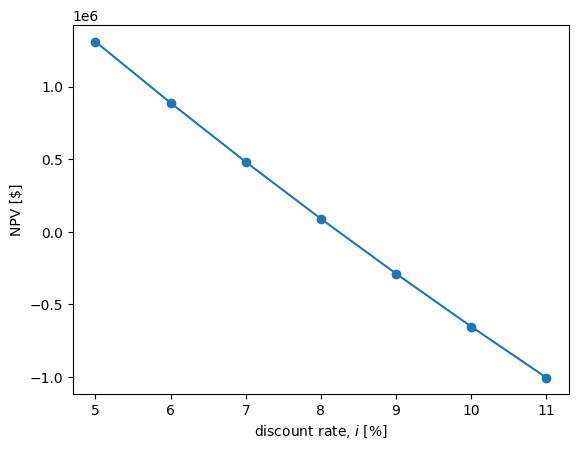

In [10]:
# Set an array of discount rates
i_array = np.arange(0.05, 0.12, 0.01)

# Compute the corresponding NPV values
NPV_array = np.zeros(np.size(i_array))
for j in range(0, np.size(i_array)):
    NPV_array[j] = NPV(i_array[j], cf_year)
    print("NPV at", "{:.2f}".format(i_array[j] * 100), "is", money(NPV_array[j]))

# Plot the NPV vs. discount rate
plt.plot(100 * i_array, NPV_array, "o-")
plt.xlabel("discount rate, $i$ [%]")
plt.ylabel("NPV [$]")
plt.show()

The internal rate of return (IRR) is the discount rate when the NPV is zero.

In [11]:
IRR = np.interp(0.0, -NPV_array, 100 * i_array)
print("IRR:", "{:.2f}".format(IRR), "%")

IRR: 8.24 %


## Problem 6: Weighted Average Cost of Capital (WACC)

The WACC is the IRR threshold that must be met for a positive return on money invested in the project.

In [12]:
WACC = 100 * ((DEBT_RATIO * DEBT_COST) + (EQUITY_RATIO * EQUITY_COST))
print("WACC:", "{:.2f}".format(WACC), "%")

WACC: 7.75 %
